1.Выбрать и обосновать метрику для измерения качества.

В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения).

Критерии оценки:

Предложена метрика - 5б.

Присутствует корректное обоснование - 5б.

Дополнительный материал о метриках


*Ответ:* В качестве метрики линейной регрессии были рассматрены MSE и MAE. Поскольку задачей является предсказание стоимости, лучшим вариантов для оценки является MAE, так как эта метрика используется для финансов, чтобы, например, показать, что 10 долларов в два раза больше, чем 5.


## Импортируем нужные библиотеки

In [433]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mlp
from matminer.datasets import get_available_datasets, load_dataset
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [434]:
plt.rcParams.update({'font.size': 20})

2.Провести EDA на своих данных

В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

- Рассмотрены базовые характеристики/статистики для набора данных - 2б.

- Реализованы наиболее релевантные визуализации - 4б.

- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп). - 4б.

## Загружаем данные
Были выбраны данные из библиотеки sklearn. Необходимо предсказать стоимость домов в Калифорнии в зависимости от нескольких параметров. Таких, как популяция, средний доход, возраст дома и т.д.

In [435]:
from sklearn.datasets import fetch_california_housing

In [437]:
california = fetch_california_housing()

In [438]:
california.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block group\n        - HouseAge      median house age in block group\n        - AveRooms      average number of rooms per household\n        - AveBedrms     average number of bedrooms per household\n        - Population    block group population\n        - AveOccup      average number of household members\n        - Latitude      block group latitude\n        - Longitude     block group longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000

In [439]:
data, target = fetch_california_housing(return_X_y=True, as_frame = True)

In [440]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [441]:
data.shape

(20640, 8)

In [442]:
data.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [443]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude'],
      dtype='object')

In [444]:
data['price'] = target

In [445]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [446]:
data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [447]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


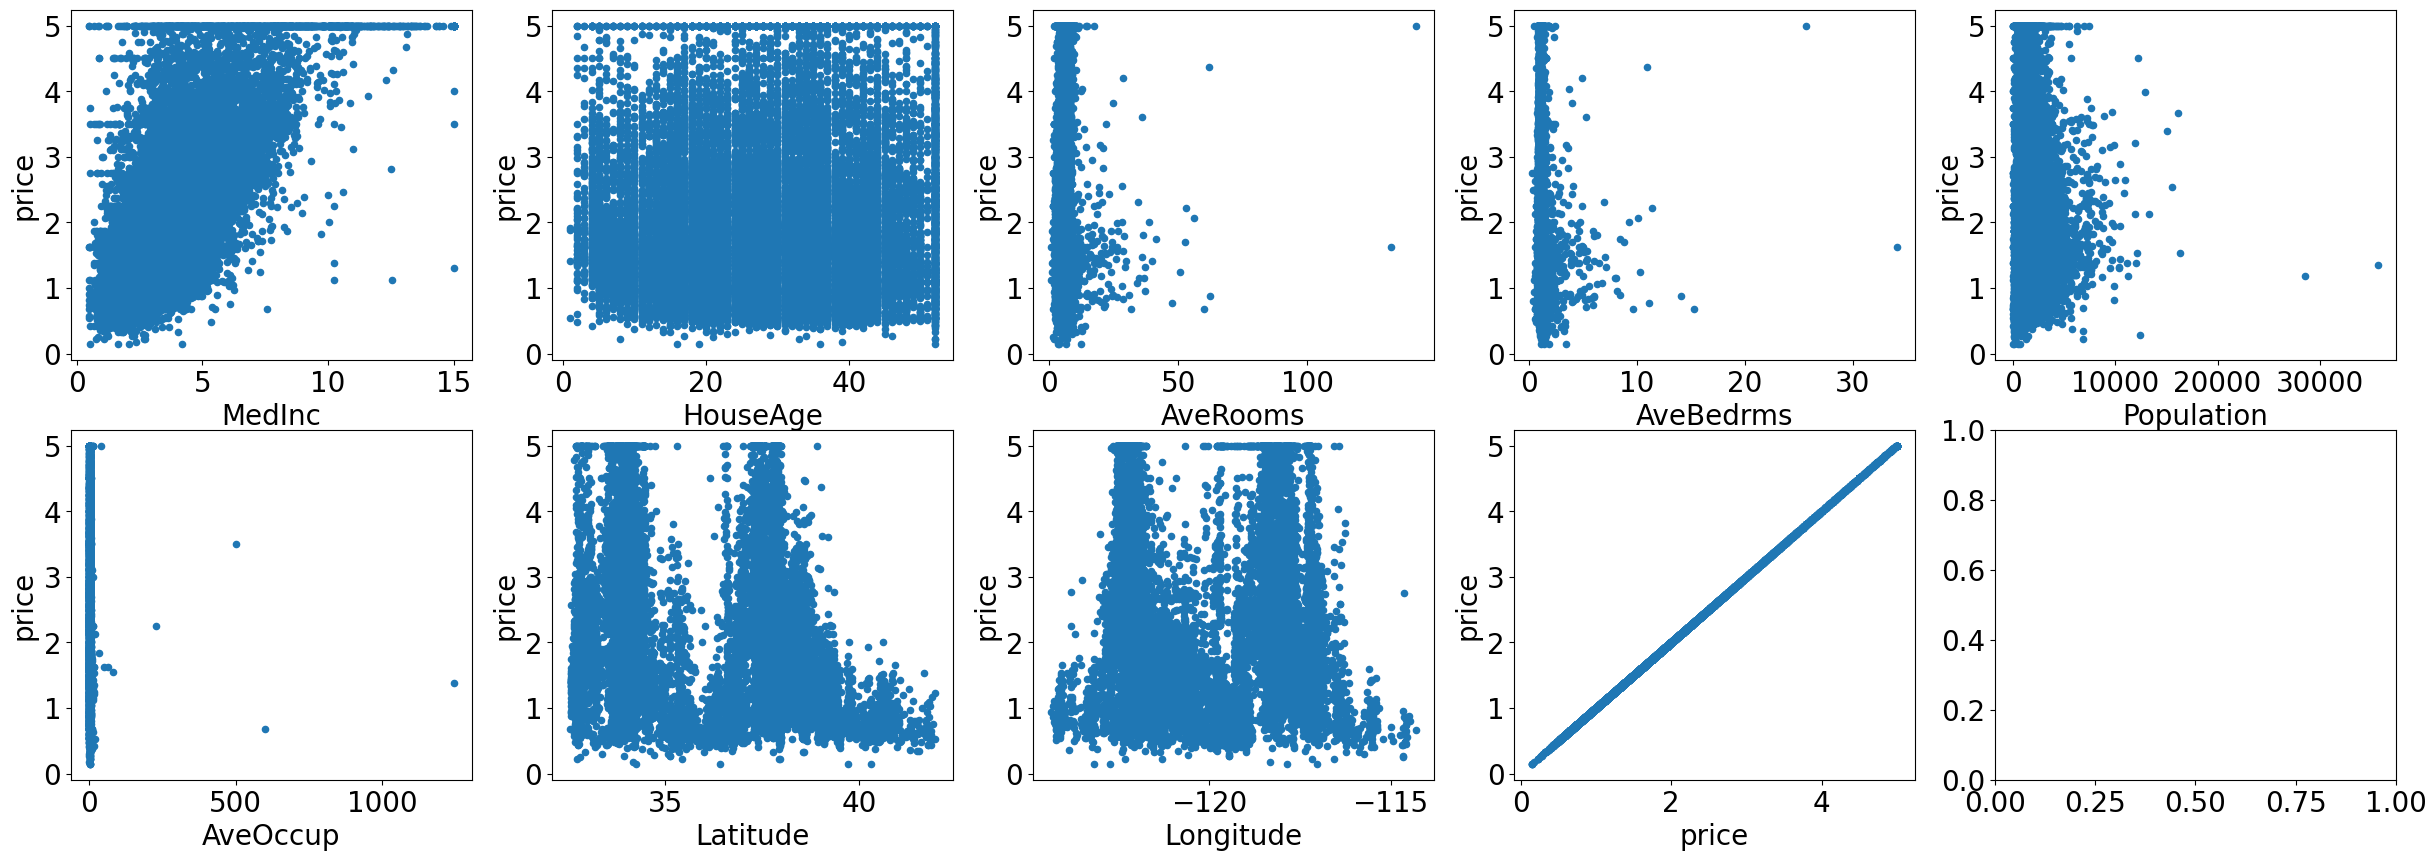

In [448]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30, 10))
for idx, feature in enumerate(data.columns):
    data.plot(feature, "price", subplots=True, kind="scatter", ax=axes[idx // 5, idx % 5])

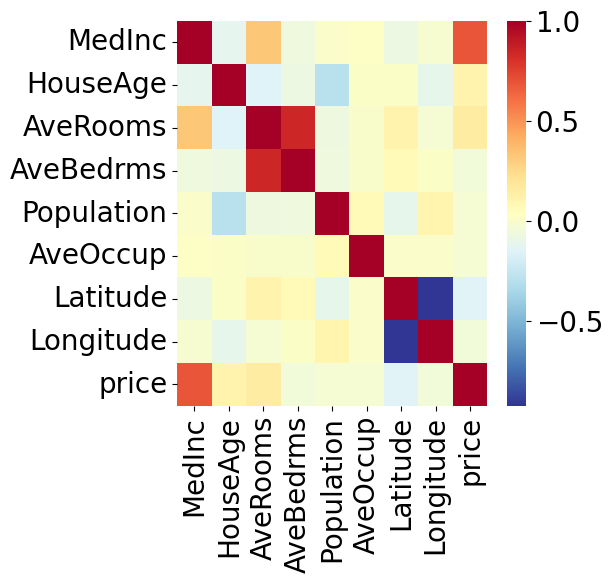

In [449]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), cmap="RdYlBu_r");

<AxesSubplot:xlabel='Population', ylabel='Density'>

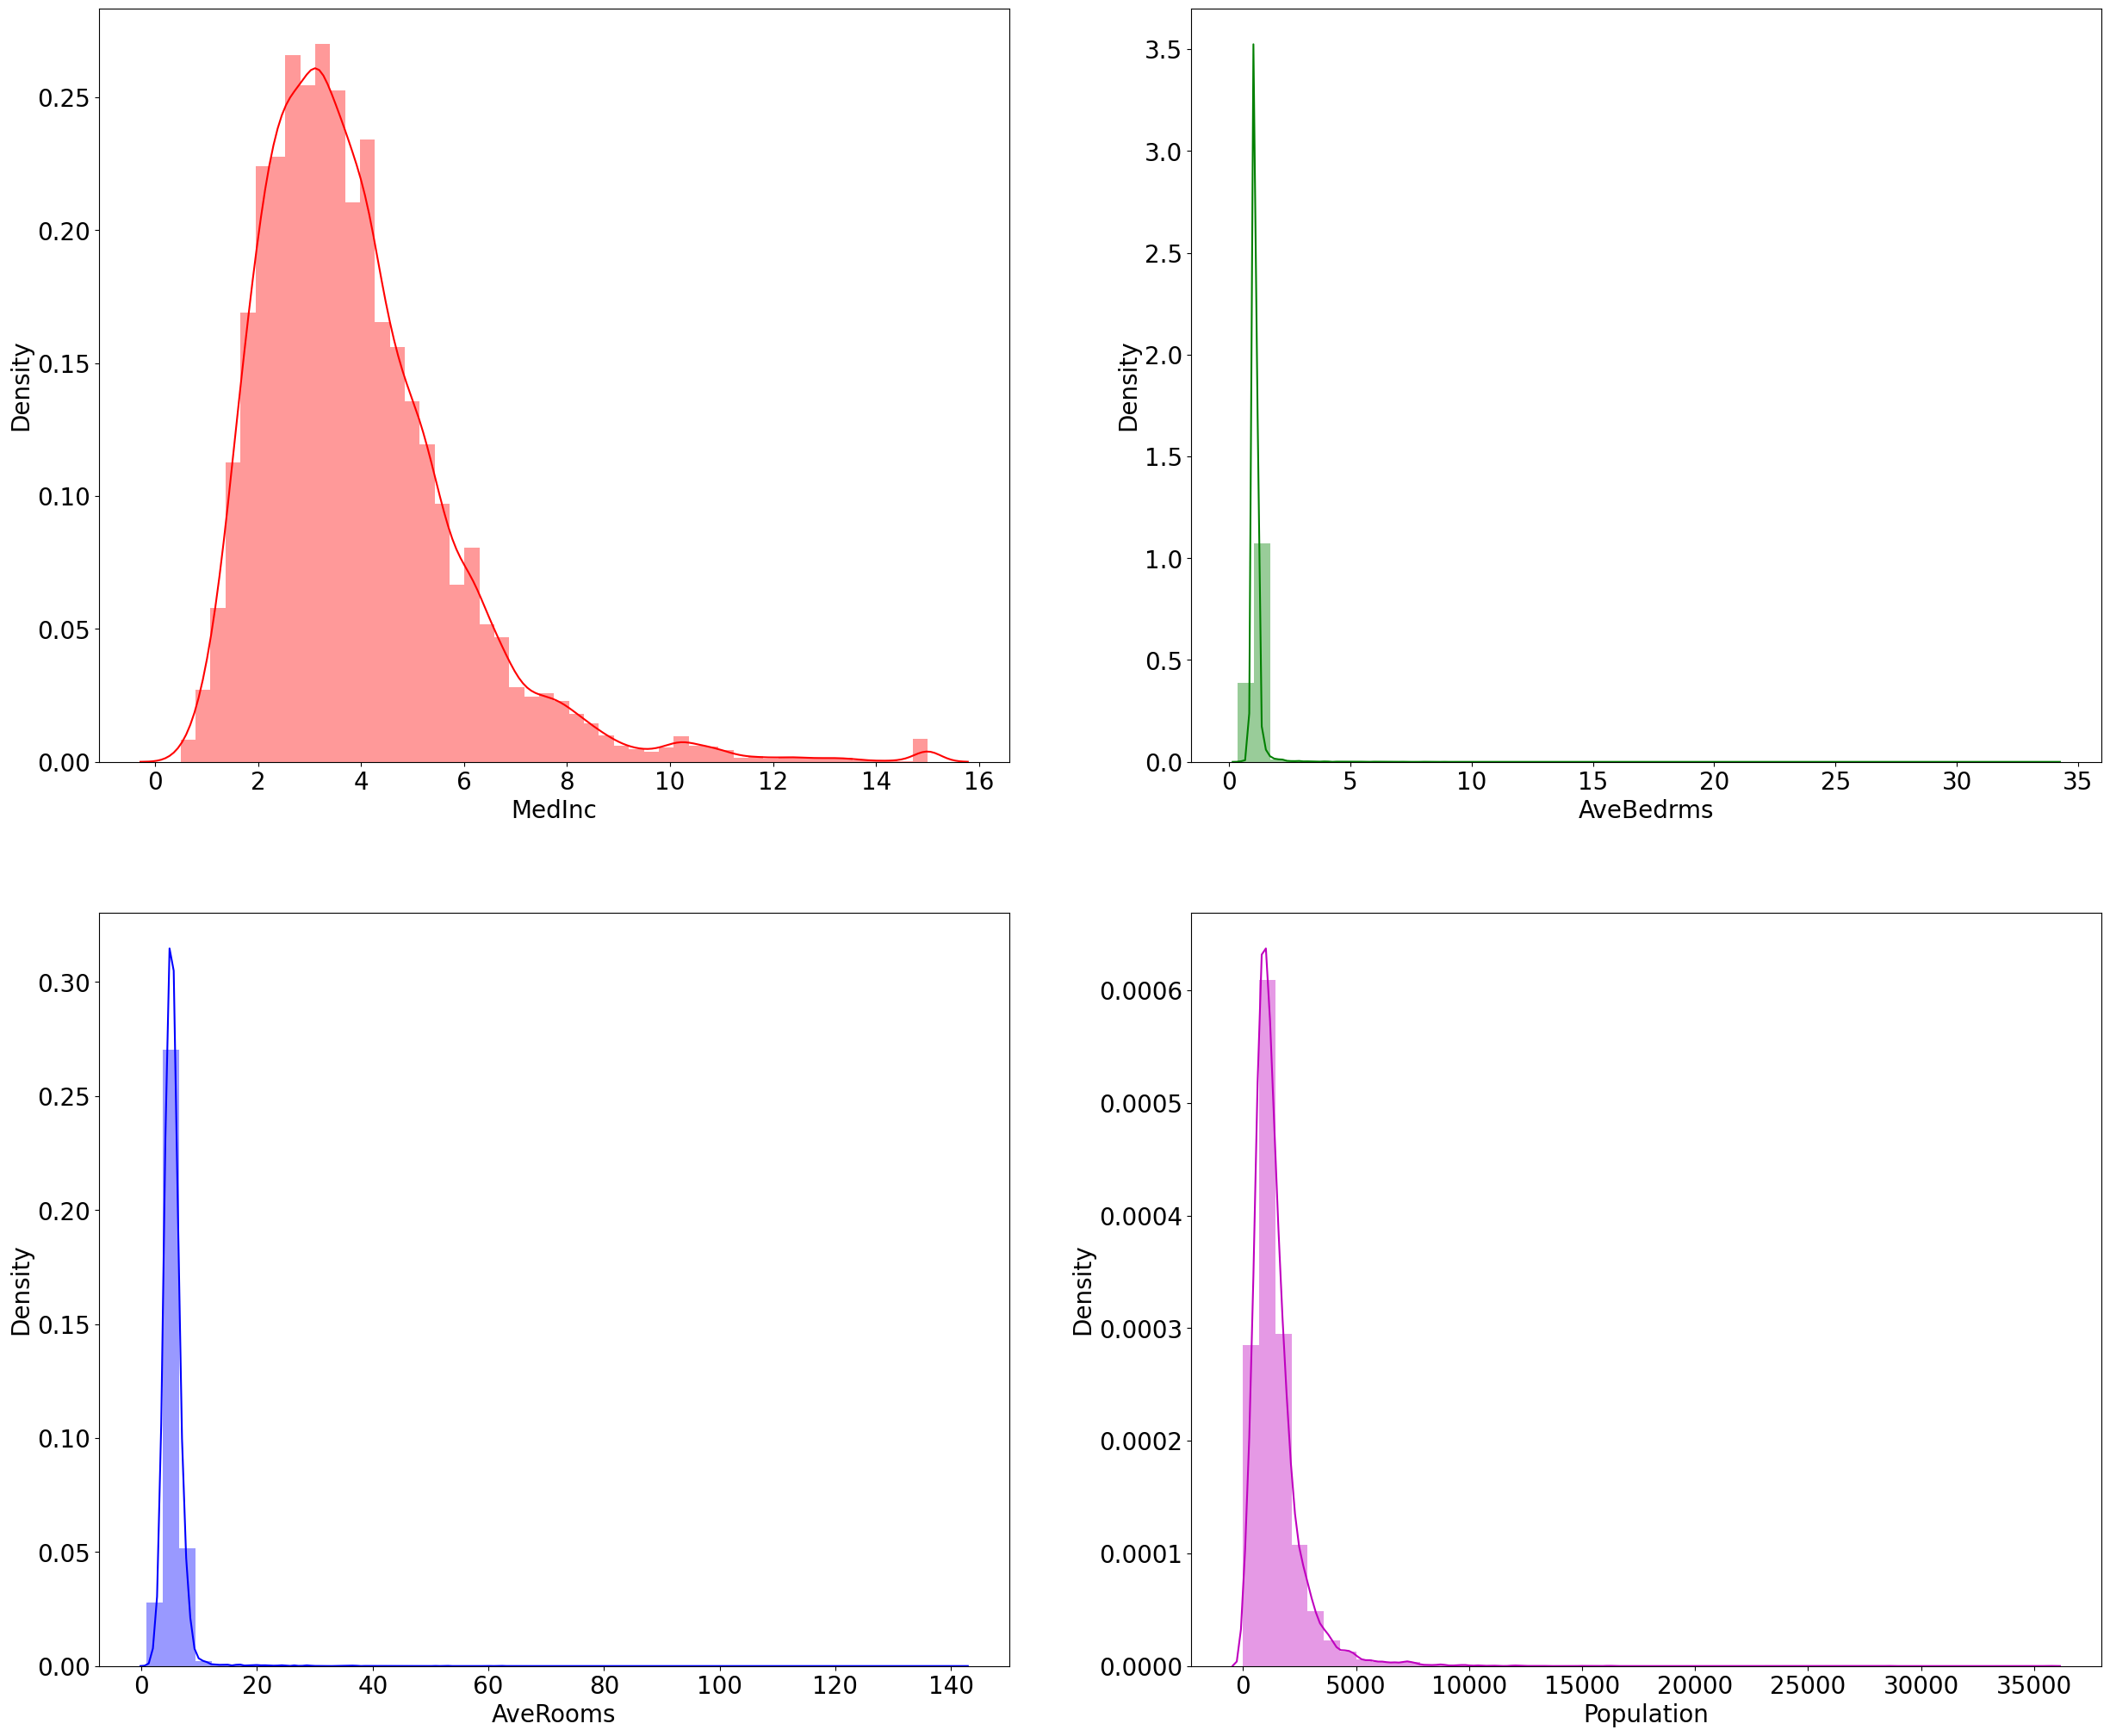

In [461]:
fig, axes = plt.subplots(2, 2, figsize=(30,25))
sns.distplot(data['MedInc'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(data['AveBedrms'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(data['AveRooms'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(data['Population'].dropna(), bins=50, color='m', ax=axes[1, 1])

3.Построить и оценить качество бейзлайна

В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

Критерии оценки:

- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3б.

- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5б.

- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2б.

## Обучение

In [452]:
data, target = fetch_california_housing(return_X_y=True, as_frame = True)
# Разбиваем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [453]:
lr = LinearRegression()

In [454]:
lr.fit(X_train, y_train)

LinearRegression()

In [455]:
lr.intercept_, lr.coef_ #предсказывает коэффициенты исходной функции

(-37.02327770606413,
 array([ 4.48674910e-01,  9.72425752e-03, -1.23323343e-01,  7.83144907e-01,
        -2.02962058e-06, -3.52631849e-03, -4.19792487e-01, -4.33708065e-01]))

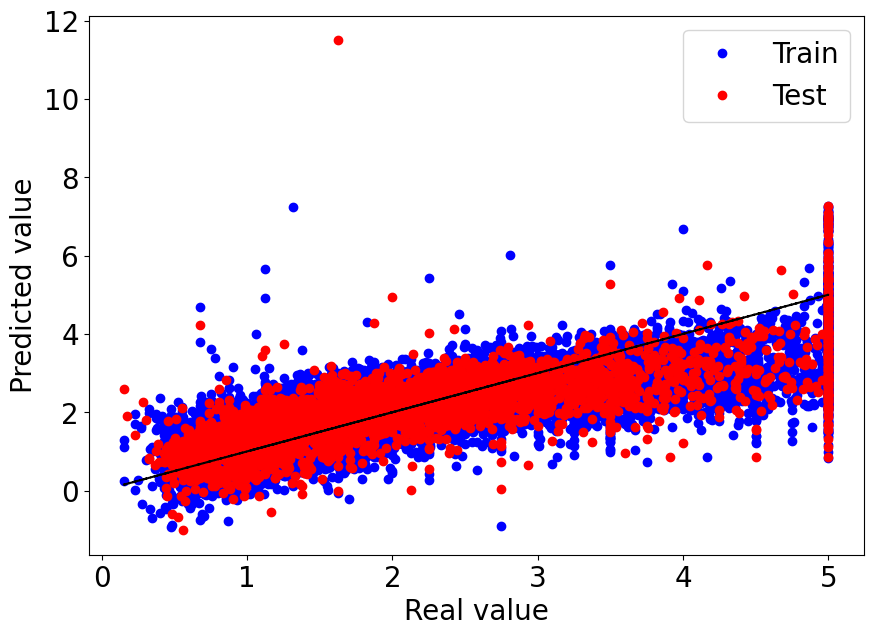

In [462]:
fig = plt.figure(figsize=(10,7))

plt.plot(y_train, lr.predict(X_train), 'ob', label='Train')
plt.plot(y_test, lr.predict(X_test), 'or', label='Test')
plt.plot(y_train[::2], y_train[::2], '--k')
plt.xlabel('Real value')
plt.ylabel('Predicted value')
plt.legend()
plt.show()

## Метрика

In [457]:
mse(y_test, lr.predict(X_test), squared=False)

0.7455813830127761

In [458]:
mae(y_test, lr.predict(X_test))

0.5332001304956566